Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Michael Cornelisse"
STUDENT_NUMBER = "s1059020"
COLLABORATOR_NAME = "Nienke Helmers"
COLLABORATOR_STUDENT_NUMBER = "s1016904"

---

# Assignment 6: Nearest Neighbour and Artificial Neural Networks

## Objective of this assignment
The objective of this exercise is to understand how k-nearest neighbor and neural networks can be used to solve classification problems.

## ** Important: ** When handing in your homework:
+ Hand in the notebook (and nothing else) named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Brightspace.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ For problems or questions: come to the practical sessions or email the student assistants.


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 5.2-5.4.


## Additional Tools
This exercise is based upon material kindly provided by the Cognitive System Section, DTU Compute, http://cogsys.compute.dtu.dk. Any sale or commercial distribution is strictly forbidden.


##  6.1 K-nearest neighbor classification
In this exercise we will use the k-nearest neighbors (KNN) method for classification.
First, we will consider the four synthetic data sets synth1, synth2, synth3 and
synth4 we used in earlier assignments.

#### 6.1.1 (2 points)
For each of the four synthetic data sets, do the following.:

* Load the training part of the dataset `X_train` and `y_train` as well as `X_test` and `y_test`.

* Fit a  k-nearest neighbor classifier model (`KNeighborsClassifier` from `sklearn.neighbors` (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) on the train data. 
  * Choose a suitable distance measure (you should consider the distance measures `euclidean`,`cityblock`, `cosine`, and `seuclidean`). 

  * Choose a suitable number of neighbors. 
  
* Predict the class of the test data using the trained model.

* Make a scatterplot of the train and test data with the classification of the test data obtained with the best k-value and distance measures you found -- just one plot per data set is fine. You can use the `classification_plot` function from the toolbox. 
  * Use the obtained prediction of the test data in your plot.
  * Try to study the plot (use all 5 arguments) to see how test data is classified using the train data.

* Create the confusion matrix, plot it using the `plot_confusion_matrix` function given below, and calculate the accuracy and error rate. Print or show the accuracy and error rate for each dataset.

Answers the following questions for each dataset:

* Which distance measures worked best for each of the four problems? Can you explain why?

* How many neighbors were needed for the four problems? 

* Can you give an example of when it would be good to use a large/small number of neighbors? Consider e.g. when clusters are  well separated versus when they are overlapping.

Hints:

* To generate a confusion matrix, you can use the function confusion_matrix() from the module sklearn.metrics. You can use the function below to plot the confusion matrix. Don't remember how to read a confusion matrix? Check the wiki page: https://en.wikipedia.org/wiki/Confusion_matrix



In [36]:
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm,y):
    df_cm = pd.DataFrame(cm, index = [i+1 for i in np.unique(y)],
                  columns = [i+1 for i in np.unique(y)])
    plt.figure()
    sn.heatmap(df_cm, annot=True)
    plt.title('Confusion matrix')
    plt.xlabel('Predicted class')
    plt.ylabel('Actual class')
    plt.show()

In [1]:
##Answer to question 6.1.1
import numpy as np
from scipy.io import loadmat
from sklearn.neighbors import KNeighborsClassifier
from toolbox.classification_plot import classification_plot
from sklearn.metrics import confusion_matrix, accuracy_score

for i in range(4):
    synth = loadmat('./data/synth'+ str(i+1) + '.mat')
    X_train = synth['X_train']
    X_test = synth['X_test']
    y_train = np.ravel(synth['y_train'])
    y_test = synth['y_test']
    
    neighbors = KNeighborsClassifier(n_neighbors = 10, metric = 'seuclidean') # make as dictionary, variance along axis = 0
    neighbors.fit(X_train, y_train)
    y_predict = neighbors.predict(X_test)  
    plt.figure(figsize=(10, 10))
    classification_plot(X_test, y_test, y_predict, X_train, y_train)
    plt.title('Classification plot of synth{}'.format(i+1))
    
    cm = confusion_matrix(y_test, y_predict)
    plot_confusion_matrix(cm, y_test)
    
    accuracy = accuracy_score(y_test, y_predict)
    error = 1 - accuracy
    print('The accuracy of the classifier is {} and the error is {}.' .format(accuracy,error))
    

TypeError: __init__() takes exactly 1 positional argument (0 given)

Synth1
Because the date in synth1 is very well separated, the type of distance measure did not influence the classification: all were correctly classified. The same goes mostly for the amount of neigbhbors as well.

Synth2

Synth3

Synth4


A large amount of neighbors is more useful when the classes aren't well separated, because then it can base its class on more points, having more chance of being accurate. When the classes are well-separated, a small amount of neighbors is fine, because it will be easily classified correctly; increasing the amount of neighbors only increasese the chances of misclassifying in this case.

#### 6.1.2 (1 points)
In general we can use cross-validation to select the optimal distance metric and number of nearest neighbors, k.This can however be computationally expensive. 

We now return to the Iris data that we have considered in previous exercises, and will attempt to classify the Iris flowers using KNN. 

* Load the Iris data into Python with the `pandas` function `read_excel()` and save it to a variable called `iris_data`. Inspect the data by printing the `head()` of the dataframe. 

* Use the values of the 4 variables `Sepal Length,  Sepal Width,  Petal Length,  Petal Width` to create a data set `X`. Use the `Type` column to create the labels `labels`. Both `X` should be a numpy array! You can use the `to_numpy()` method for this. `labels` will be a Pandas series.

* Convert the Pandas series `labels` to an integer encoding by using the `LabelEncoder` in scikit-learn. Save the integer encoding, which should be a numpy array to a variable called `y`.

* Use leave-one-out cross-validation to estimate the optimal number of neighbors, k, for the k-nearest neighbor classifier. Save the vector of averaged errors to a variable called `mean_errors`. This should be a numpy array.

* Plot the cross-validation average classification error as a function of k for $k = 1,..,40$.

You can use the function `LeaveOneOut` from `sklearn.model_selection`: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html

What is the optimal number of neighbors to use for this data?

Text(0, 0.5, 'Mean error')

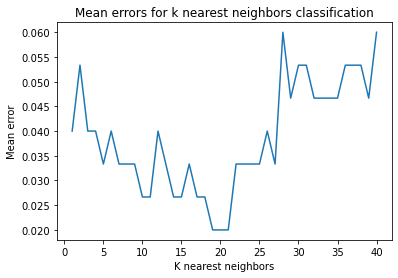

In [144]:
##Answer to question 6.1.2
# YOUR CODE HERE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import LeaveOneOut


iris_data = pd.read_excel('./data/iris.xls')
iris_data.head()

X = iris_data[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']].to_numpy()
label = iris_data['Type']
le = LabelEncoder()
y = le.fit_transform(label)

loo = LeaveOneOut()
mean_errors = []
for i in range(1, 41):
    errors = []
    for train_index, test_index in loo.split(X,y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        neighbors = KNeighborsClassifier(n_neighbors = i)
        neighbors.fit(X_train, y_train)
        y_predict = neighbors.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_predict)
        error = 1 - accuracy
        errors.append(error)
    mean_errors.append(np.mean([errors]))

plt.plot(range(1,41), mean_errors)
plt.title('Mean errors for k nearest neighbors classification')
plt.xlabel('K nearest neighbors')
plt.ylabel('Mean error')

In [77]:
"""Checks whether 6.1.2 output is correct"""
"""DO NOT MODIFY THIS CELL"""

'DO NOT MODIFY THIS CELL'

The optimal number of neighbors lies between 19 and 21.

#### 6.1.3 (2 points)

KNN can also be used for regression by predicting the output of an observation as the average of the output values of its nearest neighbors. 

KNN regression in Python is most easily performed using the `KNeighborsRegressor` in `sklearn.neighbors`. 

We'll predict the alcohol content of wine in the wine data with KNN, using the other 10 attributes as predictors. 

* Load the Wine data into Python and save it to a variable called `wine_data`.

* Construct the `X` and `y` numpy arrays by slicing the `wine_data`. `y` should be a vector containing only the alcohol percentage, the other variables should be contained in `X`.

* We will use the mean squared error as a performance metric. This can be calculated using `mean_squared_error` in `sklearn.metrics`.

* Use k-fold cross-validation with k=5 to estimate the optimal number of neighbors, k, for the k-nearest neighbor classifier. Save the vector of averaged errors to a variable called `mean_errors`. This should be a numpy array. **N.B.** This means you will have a mean of mean squared errors for each value of k.

* The cross-validation procedure should be performed using `KFold` in `sklearn.model_selection`. The variable `random_state` **must** be set to a value of `42`. The variable `shuffle` must be set to `True`.

* Plot the calculated cross-validation averaged mean square error as a function of k for $k = 1,..,40$.

* Repeat all these steps, but perform standardization during the procedure. Make sure the mean and standard deviation are calculated over **only** the train data, and applied on both train and the test data. You can use the `StandardScaler` in `sklearn.preprocessing` for this. Save the errors to `mean_errors_std` using the same methodology as for `mean_errors`.

Then answer the following questions:
* What is the optimal value for the number of nearest neighbors? Answer for both the preprocessing procedures (no preprocessing and standardization).

* Does the algorithm perform better with or without standardization? Explain your observations.

* Why do we need to calculate the mean and standard deviation on the training data rather than over the entire data?

Text(0, 0.5, 'Mean error')

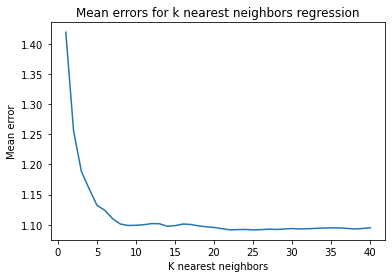

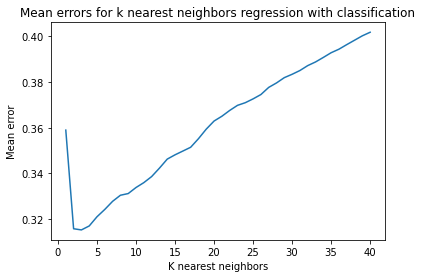

In [162]:
##Answer to question 6.1.3
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

wine_data = loadmat('./data/wine.mat')
wine = wine_data['X']
X = wine[:,[0,1,2,3,4,5,6,7,8,9]]
y = wine[:,[10]]

#Without standardization
kf = KFold(5, shuffle = True, random_state = 42)
mean_errors = []
for i in range(1,41):
    errors = []
    for train_index, test_index in kf.split(X,y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        neighbors = KNeighborsRegressor(n_neighbors = i)
        neighbors.fit(X_train, y_train)
        y_predict = neighbors.predict(X_test)
        
        error = mean_squared_error(y_test, y_predict)
        errors.append(error)
    mean_errors.append(np.mean([errors]))
    
plt.plot(range(1,41), mean_errors)
plt.title('Mean errors for k nearest neighbors regression')
plt.xlabel('K nearest neighbors')
plt.ylabel('Mean error')

#With standardization
scaler = StandardScaler()
mean_errors_std = []
for i in range(1,41):
    errors = []
    for train_index, test_index in kf.split(X,y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        scaler.fit(X_train, y_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        
        neighbors = KNeighborsRegressor(n_neighbors = i)
        neighbors.fit(X_train, y_train)
        y_predict = neighbors.predict(X_test)
        
        error = mean_squared_error(y_test, y_predict)
        errors.append(error)
    mean_errors_std.append(np.mean([errors]))

plt.figure(figsize = (6,4))
plt.plot(range(1,41), mean_errors_std)
plt.title('Mean errors for k nearest neighbors regression with classification')
plt.xlabel('K nearest neighbors')
plt.ylabel('Mean error')

In [ ]:
"""Checks whether 6.1.2 output is correct"""
"""DO NOT MODIFY THIS CELL"""

YOUR ANSWER HERE

## 6.2 Artificial Neural Networks

In this part of the exercise we will use neural networks to classify the xor data. We will consider a network with an input layer, one layer of hidden units and an output layer. The class `sklearn.neural_network.MLPClassifier` can be used to create a Multilayer Perceptron that can minimizes the Cross-Entropy loss function for any dataset X with corresponding labels y. See https://scikit-learn.org/stable/modules/neural_networks_supervised.html 

We use the data contained in `xor.mat` in the Data folder. 

#### 6.2.1 (0.5 points)
Check out the documentation for `MLPClassifier` and read the documentation well. Make sure you understand at least in general terms how the learning process works. Answer the following questions before you continue:

1. For a single perceptron, the activation function can be linear, e.g. $f(x) = x$. However, the activation function used in the MLP class is a non-linear function. Why does it not make sense for a MLP to use such a linear activation function? Hint: what does the following computation simplify to if $f(x)$ is such a simple linear function: $f(Wo*f(Wh*X_i))$?
2. The MLPClassifier has a few optional parameters. For each of the following parameters, explain how changing the parameter might affect the learning process or the resulting solution:

> `hidden_layer_sizes`:

> `max_iter`:

> `learning_rate`:

> `learning_rate_init`:

   3\. Use the following commands to create a small test set:

> `Xtest = np.array([[0,0],[0,1],[1,0],[1,1]]).`

> `ytest = np.array([0,0,0,1])`
     

Create a MLPClassifier with 1 hidden layer using the `lbfgs`solver and fit the data. You can leave the other parameters unchanged. Use the score method to compute the mean accuracy. How well does the MLP perform on this problem? Use the function `MLPPlot.plot_boundaries` function to plot the data and the decision boundaries. Why does(n't) it work well with one hidden unit? Could you improve by using more?

#### NB: the weights are initialised randomly, so you should run the code a few times untill you get a decent result.

[[0 0]
 [0 1]
 [1 0]
 [1 1]]


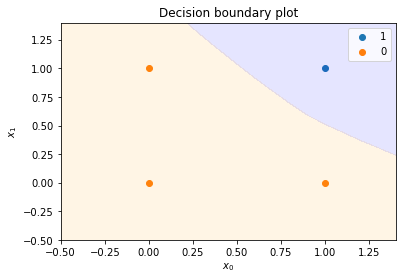

In [9]:
##Answer to question 6.2.1
from sklearn.neural_network import MLPClassifier
from  toolbox.MLPPlot import MLPPlot

Xtest = np.array([0,0, 0,1,1,0, 1,1]).reshape(4,2)
print(Xtest)
ytest = np.array([0,0,0,1])

clf = MLPClassifier(solver = 'lbfgs')
clf.fit(Xtest, ytest)
plotter  =  MLPPlot(Xtest, ytest, clf)
plotter.plot_boundaries()

1 Activation functions determine the output of a neural network. If that function is linear, there can only be one hidden layer, because adding extra layers adds additional x variables into it.

2 
1. hidden_layer_sizes: The size of the hidden layer indicates the number of neurons per layer ?????????
2. max_iter: This parameter gives the max number of times the neural network's weights are adjusted to fit the data  (or less if convergence is reached). When this number is low, the function might not fit the data correctly and the predictions that the network will make will be insufficient. Increasing the number makes the neural network more accurate for classification, but it can take a long time for the network to finish convergence.
3. learning_rate: The learning rate indicates how much the weights are adjusted each iteration. When the value is small, the network is not trained very well, but a large value results in very varying weights that can throw off the accuracy of the neural network.
4. learning_rate_init: This value indicates the initial learning rate of the neural network, which can be adjusted during the learning process in an invscaling or adaptive way. Similar to the learning rate, making the initial value very small can lead to a non-trained network and a large value to a network with  bad accuracy,. The effect is somewhat diminished if the learning rate itself is not constant and is altered to a more acceptable size.

3


#### 6.2.2 (0.5 points)
Load the data from `xor.mat` into Python using `scipio.io.loadmat(...)` and make `y` a 1d vector. Make a scatter plot of the two attributes in `X`, coloring the points according to the class labels `y` and add a legend. Use matplotlib functions, and no toolbox functions for this. How are `X` and `y` related?

In [ ]:
##Answer to question 6.2.2
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

#### 6.2.3 (2 points)
Create a MLPClassifier with 1 hidden unit. Fit X and y. Use 10-fold cross-validation `KFold` from `sklearn.model_selection` to create training and test sets and estimate the classification error for both. In each fold, run the learning process 5 times and take the best classification error.  

Plot the decision boundaries of one network trained on the entire data set, again with 1 hidden unit, and explain why the network performs so well/poorly.

In [ ]:
##Answer to question 6.2.3
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

#### 6.2.4 (1 point)
Repeat 6.2.3, but use two hidden units instead of one. Does the classification performance improve? Can you explain why?

In [ ]:
##Answer to question 6.2.4
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

#### 6.2.5 (1 point)
Repeat 6.2.3 with 10 hidden units. What happens to the decision boundaries of the learned neural networks? What are the benefits and drawbacks of including
many hidden units in the network?

In [ ]:
##Answer to question 6.2.5
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE